<a href="https://colab.research.google.com/github/antfolk/BMEN35_2023/blob/main/Session3/BMEN35_Ex8_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression
In this notebook we will be looking into Linear Regression.

Let us start by importing our usual suspects and generate some data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Lets start by making a simple example
N = 500 # Number of datapoints
X = 5 *np.random.rand(N,1)
y =  2 - 3 * X + np.random.randn(N,1)

We want to examine this data and we can do that by plotting it. We will use a scatterplot for this example.

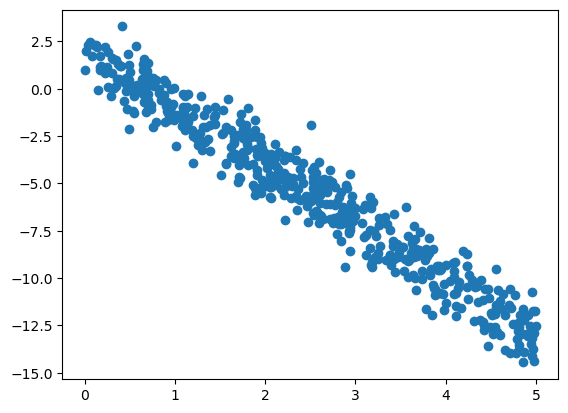

In [2]:
# Lets make a scatter plot of the data to see what it looks like
plt.scatter(X,y)
plt.show()

We can try to guess intercept and slope by visual inspection here and see how well it correlates with the algorithm.

Next we will start with the algorithm. We generated X and y but we need to add one column of ones for the intercept term.

In [3]:
# We add a column of ones for the intercept (theta0)
X_b = np.hstack((np.ones([N,1]),X))

# We can solve this problem now using equation 3.14 from the book, we do it step by step here
a = np.dot(X_b.T,X_b)
b = np.linalg.inv(a)
c = np.dot(b, X_b.T)
theta_a = np.dot(c,y)
# Or we write it in one line
theta_b = np.dot(np.dot(np.linalg.inv(np.dot(X_b.T,X_b)),X_b.T),y)
# We can check that they are the same
print(theta_a)
print(theta_b)

[[ 1.97482929]
 [-3.00068803]]
[[ 1.97482929]
 [-3.00068803]]


In [6]:
c.shape


(2, 2)

Lets plot the data again and add the "regression" line to the plot. Here we can calculate where two points are and make line between them.

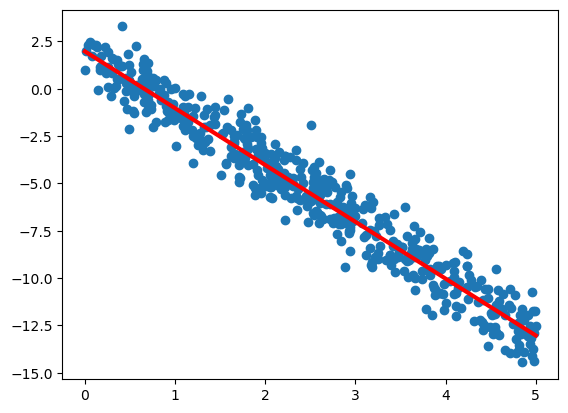

In [7]:
X_new = np.array([0,5]) # These are X-values we will use
X_new_b = np.array([[1,0],[1,5]]) # We also need the intercept term
y_hat = np.dot(X_new_b, theta_b) # We calculate/predict the values of y_hat at x = 0, x = 5
plt.scatter(X,y)
plt.plot(X_new, y_hat, 'r',linewidth=3)
plt.show()

That was all good.

Next we will try "polynomial regression". We will make up some data here.

In [ ]:
N = 500 # Number of datapoints
X = 10*np.random.rand(N,1) - 5
y =  2 + 0.5 * X**2 + 3 * X + np.random.randn(N,1)

# Lets make a scatter plot of the data to see what it looks like
plt.scatter(X,y)
plt.show()

Looks like it is not a straight line. We guess its a quadratic equation and start from there.


In [ ]:
# We add a column of ones for the intercept (theta0), the x^2 term and x
X_b = np.hstack((np.ones([N,1]),X**2, X))
# We can now solve this problem using equation 3.14 from the book
theta = np.dot(np.dot(np.linalg.inv(np.dot(X_b.T,X_b)),X_b.T),y)
print(theta)

Lets plot the data again and add the "regression" line. Here we cant cheat so we will make an array for x-values. Add intercept term, calculate y_hat and plot.

In [ ]:
X_new = np.linspace(-5, 5, N).reshape(N, 1) # These are X-values we will use
X_new_b = np.hstack((np.ones([N,1]),X_new**2, X_new)) # Add intercept and x^2 term
y_hat = np.dot(X_new_b, theta) #
plt.scatter(X,y)
plt.plot(X_new, y_hat, 'r', linewidth=3)
plt.show()

In the lecture you also talked about gradient descent. Lets try a version using that method. First some data.

In [ ]:
N = 500 # Number of datapoints
X = 5 *np.random.rand(N,1)
y =  1.8 + 3.4 * X + np.random.randn(N,1)
plt.scatter(X,y)
plt.show()

In [ ]:
# Gradient descent
eta = 0.01  # learning rate
n_epochs = 20 # How many iterations / epochs
theta0 = 0 # Start from zero number for
theta1 =0
cost = np.zeros(n_epochs)
n = len(X)
thetas = np.zeros((n_epochs,2)) # To save our estimated thetas
for i in range(n_epochs):
    y_hat = theta0 + theta1 * X # The current predicted value of Y
    cost[i] = np.sum((y - y_hat)**2) / n
    D_theta0 = (-2/n) * np.sum(y - y_hat)  # Derivative wrt theta0
    D_theta1 = (-2/n) * np.sum(X * (y - y_hat))  # Derivative wrt theta1
    theta0 = theta0 - eta * D_theta0  # Update theta0
    theta1 = theta1 - eta * D_theta1  # Update theta1
    thetas[i,:] = (theta0,theta1)

print(thetas[-1])

Lets check what we get with our previous method


In [ ]:
X_b = np.hstack((np.ones([N,1]),X))
theta = np.dot(np.dot(np.linalg.inv(np.dot(X_b.T,X_b)),X_b.T),y)
print(theta)

Lets plot everything again.

In [ ]:
X_new = np.linspace(0, 5, N).reshape(N, 1) # These are X-values we will use
X_new_b = np.hstack((np.ones([N,1]), X_new)) # Add intercept
y_hat_gd = np.dot(X_new_b, (theta0,theta1)) #
y_hat = np.dot(X_new_b, theta)
plt.scatter(X,y)
plt.plot(X_new, y_hat_gd, 'r', linewidth=3)
plt.plot(X_new, y_hat, 'c', linewidth=3)
plt.show()

As we actually save the thetas we can plot the predictions given each epoch

In [ ]:
import matplotlib.colors as mplc
plt.scatter(X,y)
for i in range(n_epochs):
    y_hat = np.dot(X_new_b, thetas[i,:])
    color = mplc.rgb2hex(plt.cm.OrRd(i / n_epochs))
    plt.plot(X_new, y_hat, linestyle="solid", color=color)

plt.show()

## The End